In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/Users/ari/devel/python_projects/machine_learning_project/intro_to_deep_learning'

In [3]:
mobile_model = tf.keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

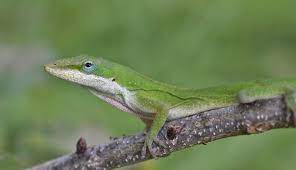

In [5]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.PNG', width=300, height=200)

In [31]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile_model.predict(preprocessed_image)

In [32]:
results = imagenet_utils.decode_predictions(predictions)

40960/35363 [==================================] - 0s 1us/step


In [33]:
results

[[('n01682714', 'American_chameleon', 0.5449009),
  ('n01685808', 'whiptail', 0.19872646),
  ('n01693334', 'green_lizard', 0.12048083),
  ('n01689811', 'alligator_lizard', 0.034978356),
  ('n01687978', 'agama', 0.032728493)]]

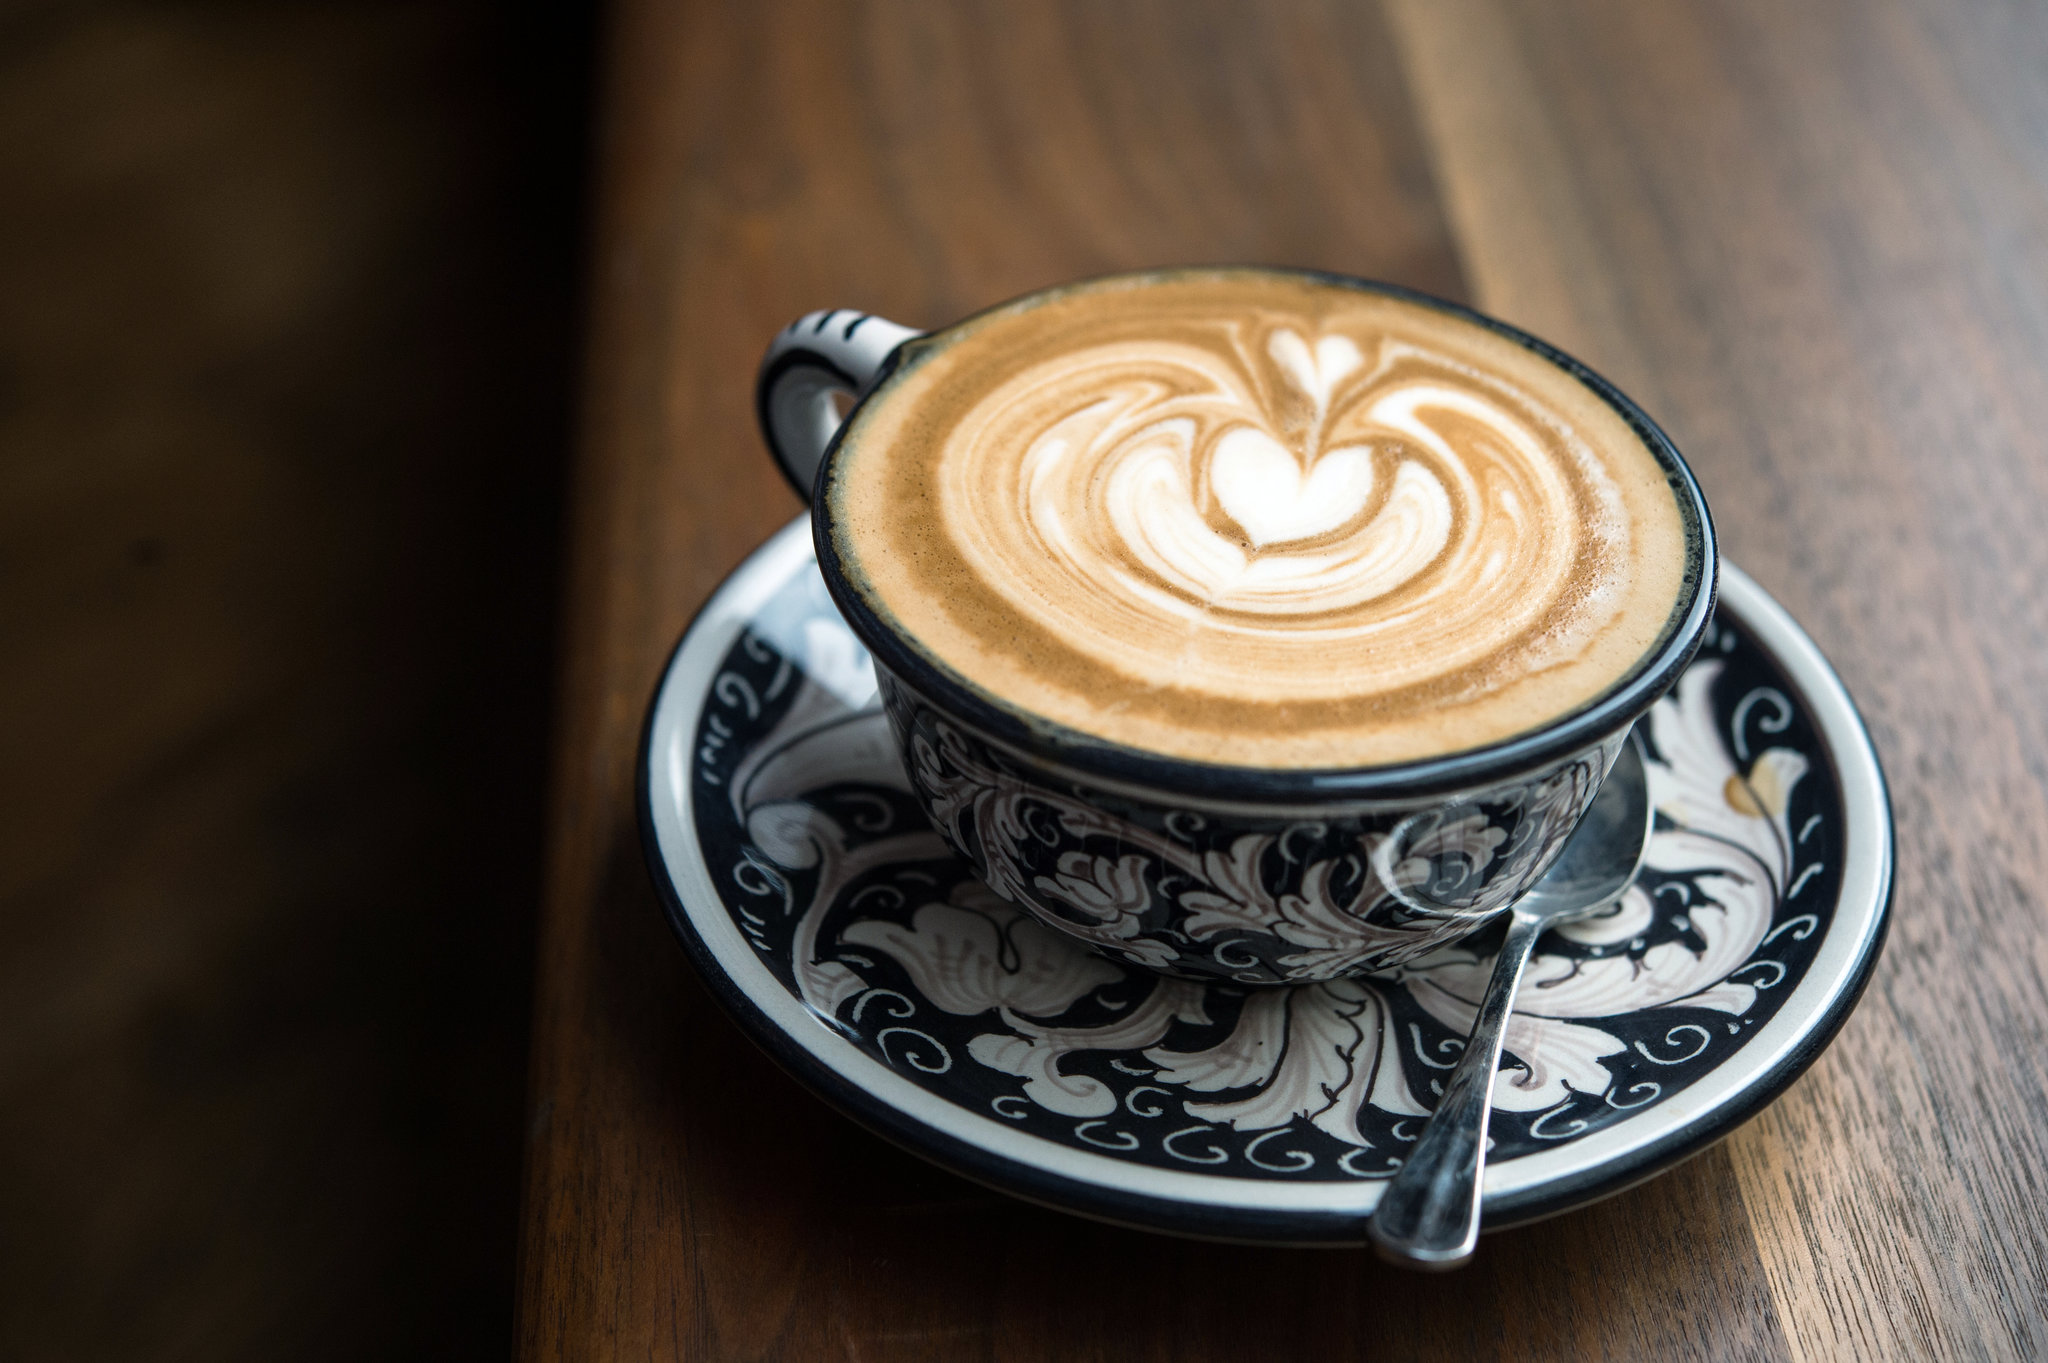

In [34]:
Image(filename='data/MobileNet-samples/2.PNG', width=300, height=200)

In [35]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile_model.predict(preprocessed_image)

In [36]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.63417685),
  ('n07930864', 'cup', 0.07862007),
  ('n01944390', 'snail', 0.072121896),
  ('n07932039', 'eggnog', 0.024809498),
  ('n04277352', 'spindle', 0.020314608)]]

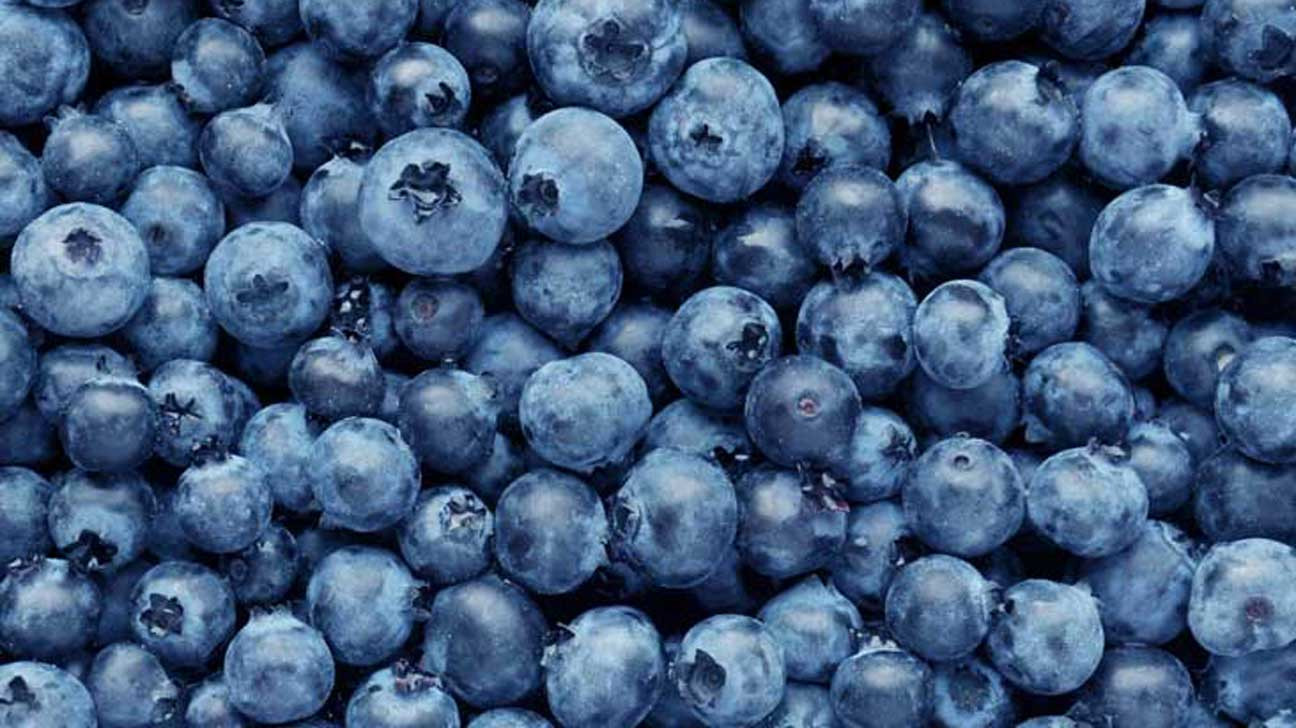

In [6]:
Image(filename='data/MobileNet-samples/3.PNG', width=300, height=200)

In [8]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile_model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03461385', 'grocery_store', 0.49796614),
  ('n03729826', 'matchstick', 0.20878315),
  ('n07753113', 'fig', 0.06571539),
  ('n07749582', 'lemon', 0.019852582),
  ('n04204347', 'shopping_cart', 0.016856711)]]

In [9]:
os.chdir('data/digits_dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')

In [10]:
os.chdir('../..')

In [11]:
os.getcwd()

'/Users/ari/devel/python_projects/machine_learning_project/intro_to_deep_learning'

In [12]:
train_path = 'data/digits_dataset/train'
valid_path = 'data/digits_dataset/valid'
test_path = 'data/digits_dataset/test'

In [13]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [15]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [16]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [17]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [18]:
model = Model(inputs=mobile.input, outputs=output)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [20]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
172/172 - 64s - loss: 0.6581 - accuracy: 0.8107 - val_loss: 0.3616 - val_accuracy: 0.8667
Epoch 2/30
172/172 - 57s - loss: 0.1193 - accuracy: 0.9836 - val_loss: 0.1060 - val_accuracy: 0.9667
Epoch 3/30
172/172 - 57s - loss: 0.0610 - accuracy: 0.9918 - val_loss: 0.0704 - val_accuracy: 0.9867
Epoch 4/30
172/172 - 56s - loss: 0.0309 - accuracy: 0.9977 - val_loss: 0.0602 - val_accuracy: 0.9867
Epoch 5/30
172/172 - 61s - loss: 0.0257 - accuracy: 0.9971 - val_loss: 0.0325 - val_accuracy: 0.9967
Epoch 6/30
172/172 - 65s - loss: 0.0286 - accuracy: 0.9959 - val_loss: 0.0445 - val_accuracy: 0.9833
Epoch 7/30
172/172 - 65s - loss: 0.0157 - accuracy: 0.9982 - val_loss: 0.0309 - val_accuracy: 0.9967
Epoch 8/30
172/172 - 58s - loss: 0.0137 - accuracy: 0.9977 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 9/30
172/172 - 59s - loss: 0.0146 - accuracy: 0.9977 - val_loss: 0.0222 - val_accuracy: 0.9967
Epoch 10/30
172/172 - 58s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0311 - val_accura

KeyboardInterrupt: 

In [26]:
test_labels = test_batches.classes

In [27]:
predictions = model.predict(x=test_batches, verbose=0)

In [28]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [29]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


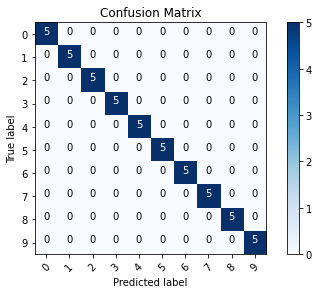

In [33]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')